<a href="https://colab.research.google.com/github/athulmkpalath/OASIS-INFOBYTE-/blob/main/Pandemic_Workforce_Dynamics_Unemployment_Rate_Analysis_during_COVID_19_in_Indian_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandemic Workforce Dynamics: Unemployment Rate Analysis during COVID-19 in Indian States**


---
INTERNSHIP PROJECT - OASIS INFOBYTE


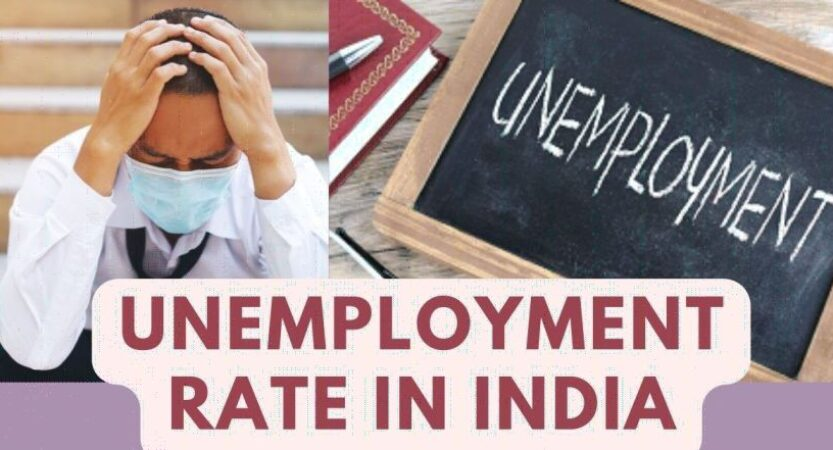

## **OBJECTIVE**

Project Objective:
The primary objective of this project, "Pandemic Workforce Dynamics: Unemployment Rate Analysis during COVID-19 in Indian States," is to comprehensively analyze the impact of lockdowns and the COVID-19 pandemic on employment opportunities and the subsequent rise in the unemployment rate across various states in India. Through the utilization of time series models and machine learning algorithms such as Random Forest, Linear Regression, Decision Tree, and SVM, we aim to:

1. Conduct an in-depth exploratory data analysis (EDA) to understand patterns, trends, and anomalies in the unemployment rate data.
2. Develop and apply time series models to forecast and analyze unemployment rates for the affected states, providing insights into the severity and duration of the unemployment crisis.
3. Assess the accuracy and performance of the applied time series models to ensure reliable and robust predictions.
4. Implement machine learning models to analyze the factors contributing to unemployment during the pandemic, identifying significant features and their impact on employment rates.
5. Present actionable insights and recommendations based on the analysis to assist policymakers and stakeholders in making informed decisions to mitigate unemployment challenges during similar crisis situations in the future.

By achieving these objectives, we aim to contribute valuable insights into understanding the economic repercussions of the pandemic on employment and labor force dynamics, aiding in the formulation of strategies to support affected regions and enhance resilience in the face of similar unforeseen circumstances.
The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.



## **DATA SOURCE**

Context
The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

This dataset contains the unemployment rate of all the states in India

Region = states in India
Date = date which the unemployment rate observed
Frequency = measuring frequency (Monthly)
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
Estimated Employed = percentage of people employed
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the
total number of people eligible to participate in the labor force
force

## **IMPORT LIBRAIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor



## **IMPORT DATA**

In [ ]:
data = pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
data.shape

(768, 7)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
# Convert ' Date' column to datetime type (note the leading space)
data[' Date'] = pd.to_datetime(data[' Date'])


In [ ]:
data.columns = data.columns.str.strip()


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Frequency' column to category type
data['Frequency'] = data['Frequency'].astype('category')

# Verify the changes
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 41.3+ KB


In [ ]:
print(data.head())

           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [ ]:
data.iloc[:, 1]


0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name: Date, Length: 740, dtype: datetime64[ns]

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 41.3+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data['Frequency'] = data['Frequency'].astype('category')


In [ ]:
data.dropna(inplace=True)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 41.3+ KB


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# 1. Feature Scaling
numerical_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']] = scaler.fit_transform(data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])


In [ ]:
data = pd.get_dummies(data, columns=['Region', 'Area'], drop_first=True)


In [ ]:
from scipy import stats

z_scores = stats.zscore(data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
data = data[(z_scores < 3).all(axis=1)]


In [ ]:

data.fillna(data.mean(), inplace=True)


<ipython-input-311-a20208f658ce>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

<ipython-input-311-a20208f658ce>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 753
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     699 non-null    datetime64[ns]
 1   Frequency                                699 non-null    category      
 2   Estimated Unemployment Rate (%)          699 non-null    float64       
 3   Estimated Employed                       699 non-null    float64       
 4   Estimated Labour Participation Rate (%)  699 non-null    float64       
 5   Region_Assam                             699 non-null    uint8         
 6   Region_Bihar                             699 non-null    uint8         
 7   Region_Chandigarh                        699 non-null    uint8         
 8   Region_Chhattisgarh                      699 non-null    uint8         
 9   Region_Delhi                             69

## **Exploratory Data Analysis (EDA)**

### summary statistics

In [ ]:
# Basic summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)

# Summary statistics for categorical columns
categorical_summary = data.select_dtypes(include=['category']).describe()
print(categorical_summary)


       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       699.000000          699.000000   
mean                          0.140596            0.143931   
std                           0.110150            0.141692   
min                           0.000000            0.000569   
25%                           0.059226            0.027124   
50%                           0.103075            0.102689   
75%                           0.196768            0.240799   
max                           0.568673            0.585766   

       Estimated Labour Participation Rate (%)  Region_Assam  Region_Bihar  \
count                               699.000000    699.000000    699.000000   
mean                                  0.489584      0.037196      0.035765   
std                                   0.124849      0.189377      0.185838   
min                                   0.000000      0.000000      0.000000   
25%                                   0.417792     

In [ ]:

data.to_csv('data.csv', index=False)

### **Data Visualization:**

Histograms for numerical variables:

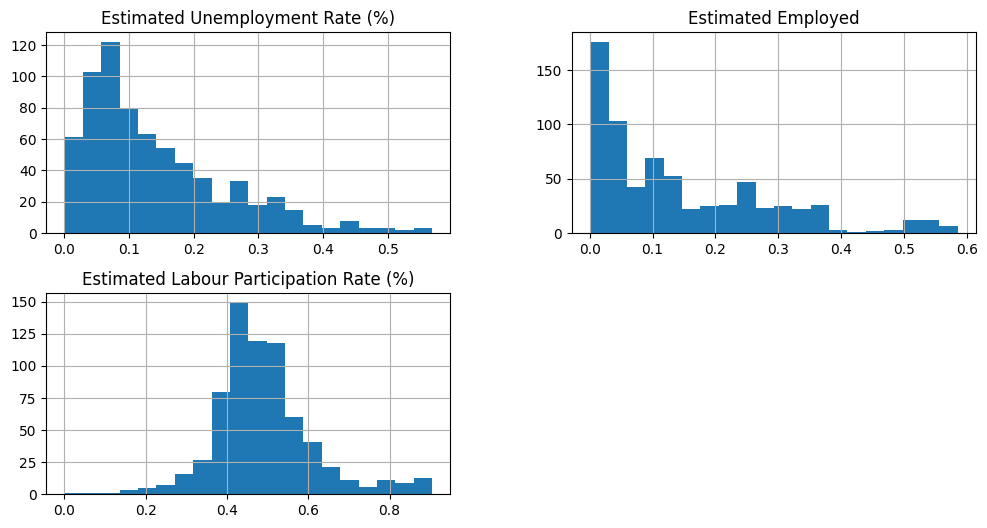

In [ ]:


data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].hist(bins=20, figsize=(12, 6))
plt.show()


 Box plots for numerical variables:

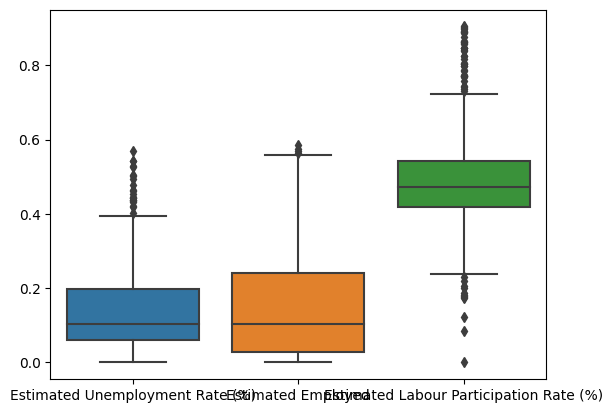

In [ ]:
import seaborn as sns

sns.boxplot(data=data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
plt.show()


Correlation Analysis:

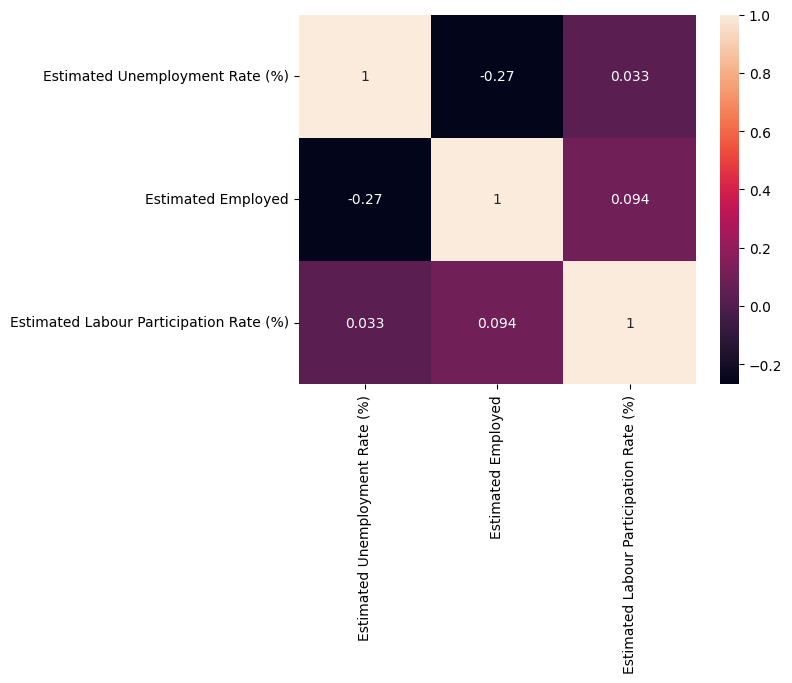

In [ ]:
correlation_matrix = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Pair Plots:

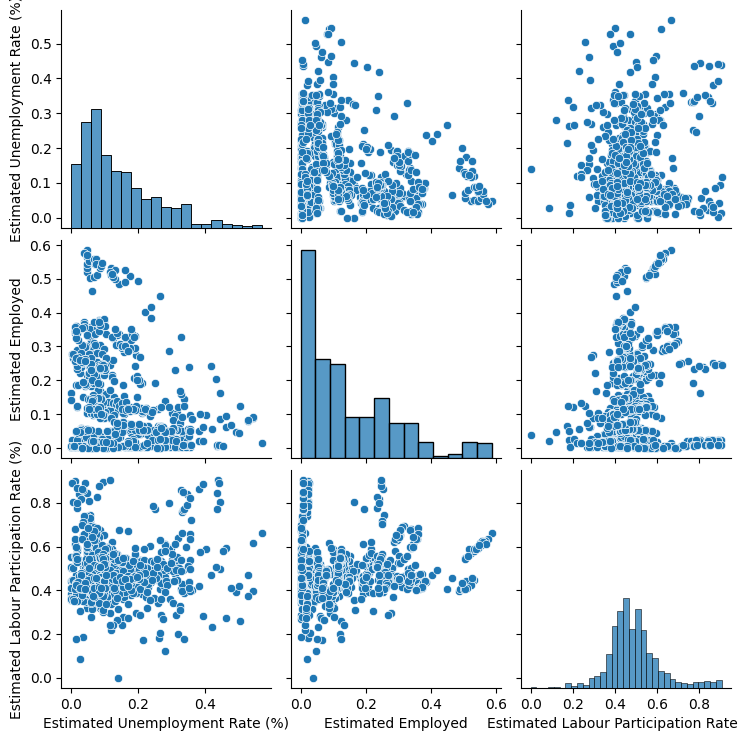

In [ ]:
sns.pairplot(data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
plt.show()


In [ ]:
# Check unique values in the 'Region' column
print(data.columns)

Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_Assam', 'Region_Bihar', 'Region_Chandigarh',
       'Region_Chhattisgarh', 'Region_Delhi', 'Region_Goa', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh', 'Region_Jammu & Kashmir',
       'Region_Jharkhand', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh', 'Region_Maharashtra', 'Region_Meghalaya',
       'Region_Odisha', 'Region_Puducherry', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Sikkim', 'Region_Tamil Nadu',
       'Region_Telangana', 'Region_Tripura', 'Region_Uttar Pradesh',
       'Region_Uttarakhand', 'Region_West Bengal', 'Area_Urban'],
      dtype='object')


Relationship Analysis:

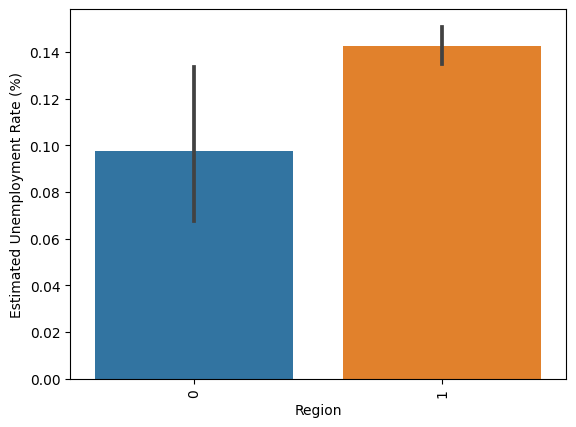

In [ ]:


# Sum up the one-hot encoded region columns
data['Region'] = data[['Region_Assam', 'Region_Bihar', 'Region_Chandigarh',
                      'Region_Chhattisgarh', 'Region_Delhi', 'Region_Goa',
                      'Region_Gujarat', 'Region_Haryana', 'Region_Himachal Pradesh',
                      'Region_Jammu & Kashmir', 'Region_Jharkhand', 'Region_Karnataka',
                      'Region_Kerala', 'Region_Madhya Pradesh', 'Region_Maharashtra',
                      'Region_Meghalaya', 'Region_Odisha', 'Region_Puducherry',
                      'Region_Punjab', 'Region_Rajasthan', 'Region_Sikkim',
                      'Region_Tamil Nadu', 'Region_Telangana', 'Region_Tripura',
                      'Region_Uttar Pradesh', 'Region_Uttarakhand', 'Region_West Bengal']].sum(axis=1)

# Create the barplot
sns.barplot(data=data, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


Correlation Heatmap for All Variables:

<ipython-input-227-6e229399d7b4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



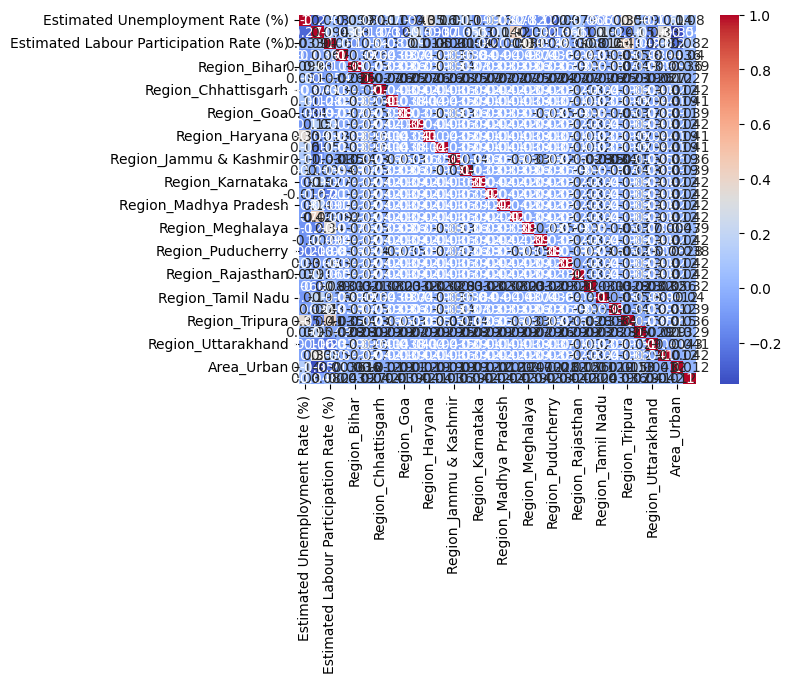

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Distribution of Categorical Variables:

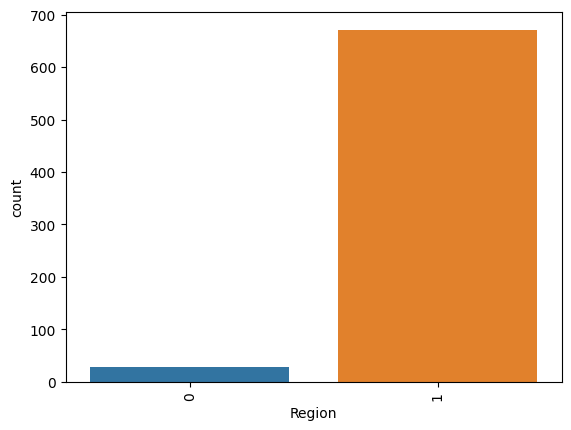

In [ ]:
sns.countplot(data=data, x='Region')
plt.xticks(rotation=90)
plt.show()


Time Series Analysis:

In [ ]:


fig = px.line(data, x=data.index, y='Estimated Unemployment Rate (%)', title='Estimated Unemployment Rate Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Estimated Unemployment Rate (%)')

fig.show()

Box Plots by Category:

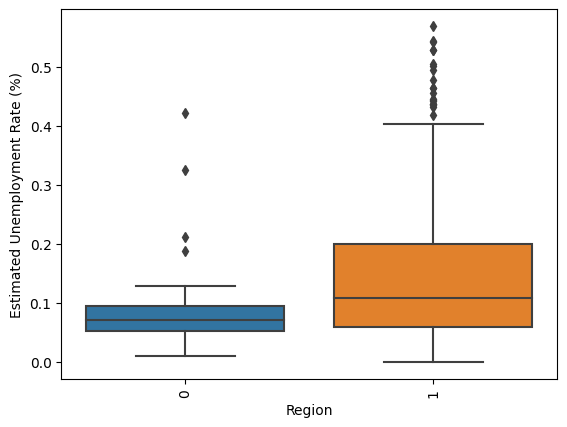

In [ ]:
sns.boxplot(data=data, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


Violin Plots:

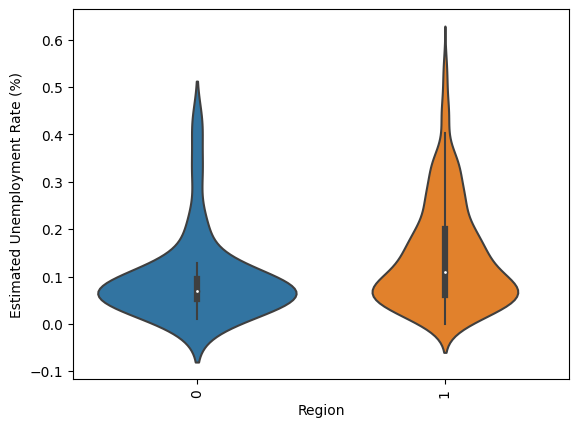

In [ ]:
sns.violinplot(data=data, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


 interactive plots

In [ ]:

# Creating an interactive scatter plot
fig = px.scatter(data, x='Estimated Unemployment Rate (%)', y='Estimated Employed', color='Region', hover_name='Region')

# Customize the plot (add labels, titles, etc.)
fig.update_layout(
    title="Interactive Scatter Plot",
    xaxis_title="Estimated Unemployment Rate (%)",
    yaxis_title="Estimated Employed"
)

# Show the interactive plot
fig.show()


3D Scatter Plots (Plotly):

In [ ]:

fig = px.scatter_3d(data, x='Estimated Unemployment Rate (%)', y='Estimated Employed', z='Estimated Labour Participation Rate (%)', color='Region')
fig.show()


Heatmap (Plotly):

In [ ]:


correlation_matrix = data.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis')
fig.show()


<ipython-input-234-034e3c6a2175>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Hexbin Plots:

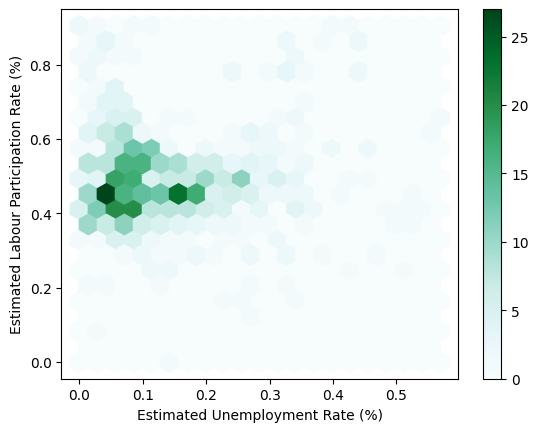

In [ ]:
data.plot.hexbin(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', gridsize=20)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show()


Bar Plot of 'Frequency':

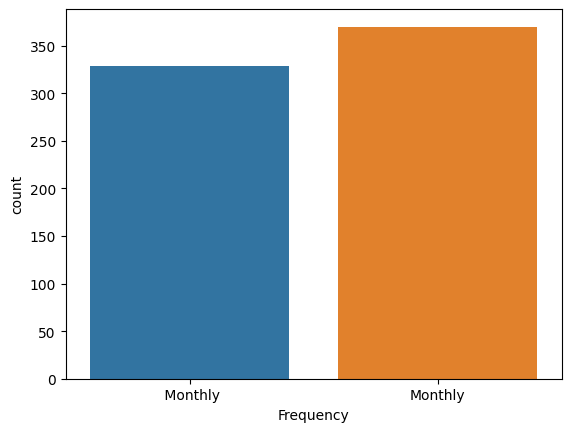

In [ ]:
sns.countplot(data=data, x='Frequency')
plt.show()


Histograms and KDEs:

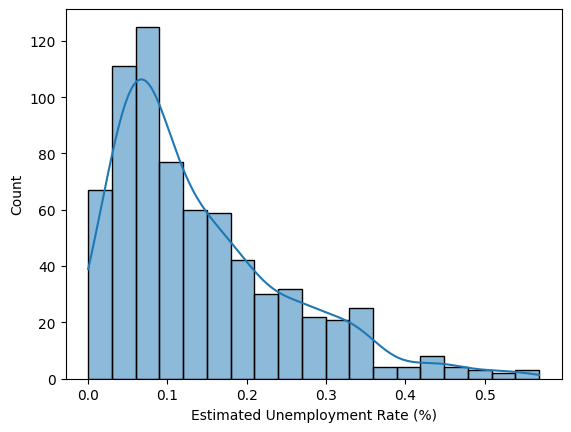

In [ ]:
sns.histplot(data['Estimated Unemployment Rate (%)'], kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.show()

## **MODELLING THE DATA**

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.columns

Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_Assam', 'Region_Bihar', 'Region_Chandigarh',
       'Region_Chhattisgarh', 'Region_Delhi', 'Region_Goa', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh', 'Region_Jammu & Kashmir',
       'Region_Jharkhand', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh', 'Region_Maharashtra', 'Region_Meghalaya',
       'Region_Odisha', 'Region_Puducherry', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Sikkim', 'Region_Tamil Nadu',
       'Region_Telangana', 'Region_Tripura', 'Region_Uttar Pradesh',
       'Region_Uttarakhand', 'Region_West Bengal', 'Area_Urban'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Frequency','Date' ])
data.columns

Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Region_Assam',
       'Region_Bihar', 'Region_Chandigarh', 'Region_Chhattisgarh',
       'Region_Delhi', 'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal', 'Area_Urban'],
      dtype='object')

### **DATA SPLITTING**

In [ ]:

# Specify the features (X) and the target variable (y)
X = data.drop(columns=['Estimated Unemployment Rate (%)'])
y = data['Estimated Unemployment Rate (%)']

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (489, 30) (489,)
Validation set shape: (105, 30) (105,)
Testing set shape: (105, 30) (105,)


### ML- MODELS

 #### *MODEL* 1 - RANDOMFORESTREGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Replace with your chosen model

# Instantiate the model
model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.03698967447286449
R-squared (R²) on Validation Data: 0.6026562711137744


#### **MODEL** 2 - GradientBoostingRegressor

In [ ]:

# Instantiate the model (you can adjust hyperparameters here)
model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.04466426491551634
R-squared (R²) on Validation Data: 0.51094387632623


#### MODEL -3 - SVM REGRESSOR MODEL

In [ ]:

# Instantiate the SVM Regressor model (you can adjust hyperparameters here)
model = SVR(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.06816251571687168
R-squared (R²) on Validation Data: 0.2971085223648392


#### MODEL -4 - DECISION TREE REGRESSOR

In [ ]:

# Instantiate the Decision Tree Regressor model (you can adjust hyperparameters here)
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)

# Calculate R-squared (R²)
r2_valid = r2_score(y_valid, y_pred_valid)

print("Mean Absolute Error (MAE) on Validation Data:", mae_valid)
print("R-squared (R²) on Validation Data:", r2_valid)


Mean Absolute Error (MAE) on Validation Data: 0.042503443910793415
R-squared (R²) on Validation Data: 0.4610415927986953


### TIME SERIES MODEL {ARIMA MODEL}

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.columns

Index(['Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_Assam', 'Region_Bihar', 'Region_Chandigarh',
       'Region_Chhattisgarh', 'Region_Delhi', 'Region_Goa', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh', 'Region_Jammu & Kashmir',
       'Region_Jharkhand', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh', 'Region_Maharashtra', 'Region_Meghalaya',
       'Region_Odisha', 'Region_Puducherry', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Sikkim', 'Region_Tamil Nadu',
       'Region_Telangana', 'Region_Tripura', 'Region_Uttar Pradesh',
       'Region_Uttarakhand', 'Region_West Bengal', 'Area_Urban'],
      dtype='object')

In [ ]:
data.head()

,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,...,Region_Punjab,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal,Area_Urban
0,2019-05-31,Monthly,0.047563,0.261321,0.504895,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-30,Monthly,0.039745,0.256002,0.484808,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-07-31,Monthly,0.048866,0.263236,0.509284,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-08-31,Monthly,0.043263,0.267588,0.517218,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-09-30,Monthly,0.067370,0.266955,0.529203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data= data.drop(columns = ['Frequency',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_Assam', 'Region_Bihar', 'Region_Chandigarh',
       'Region_Chhattisgarh', 'Region_Delhi', 'Region_Goa', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh', 'Region_Jammu & Kashmir',
       'Region_Jharkhand', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh', 'Region_Maharashtra', 'Region_Meghalaya',
       'Region_Odisha', 'Region_Puducherry', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Sikkim', 'Region_Tamil Nadu',
       'Region_Telangana', 'Region_Tripura', 'Region_Uttar Pradesh',
       'Region_Uttarakhand', 'Region_West Bengal', 'Area_Urban'])

In [ ]:
data.columns

Index(['Date', 'Estimated Unemployment Rate (%)'], dtype='object')

In [ ]:
data.head()

,Date,Estimated Unemployment Rate (%)
0,2019-05-31,0.047563
1,2019-06-30,0.039745
2,2019-07-31,0.048866
3,2019-08-31,0.043263
4,2019-09-30,0.067370


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             699 non-null    object 
 1   Estimated Unemployment Rate (%)  699 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.0+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             699 non-null    datetime64[ns]
 1   Estimated Unemployment Rate (%)  699 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


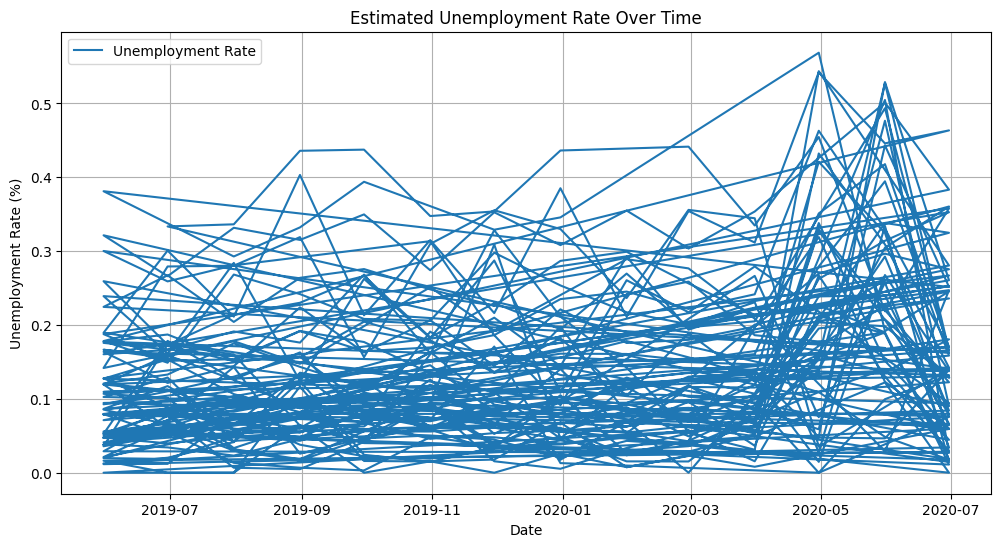

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima




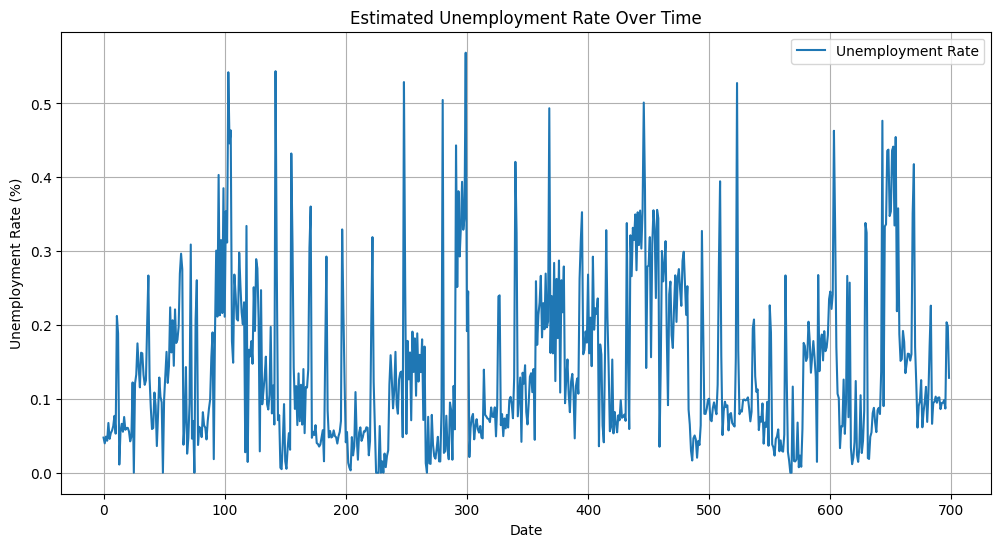

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Use auto_arima to determine the best SARIMA model parameters
model = auto_arima(data['Estimated Unemployment Rate (%)'], seasonal=True, stepwise=True, trace=True, suppress_warnings=True, error_action="ignore")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1395.118, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1097.192, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1360.223, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1263.242, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-422.857, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1396.858, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1329.650, Time=1.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1395.233, Time=1.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1395.742, Time=1.50 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1337.046, Time=0.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1397.142, Time=1.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1382.796, Time=0.78 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1395.145, Time=1.63 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1386.562, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)

In [ ]:
# Fit the SARIMA model
p, d, q = model.order
P, D, Q, s = model.seasonal_order

sarima_model = SARIMAX(data['Estimated Unemployment Rate (%)'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()


In [ ]:
# Make forecasts
forecast_steps = 12  # Adjust the number of steps ahead you want to forecast
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


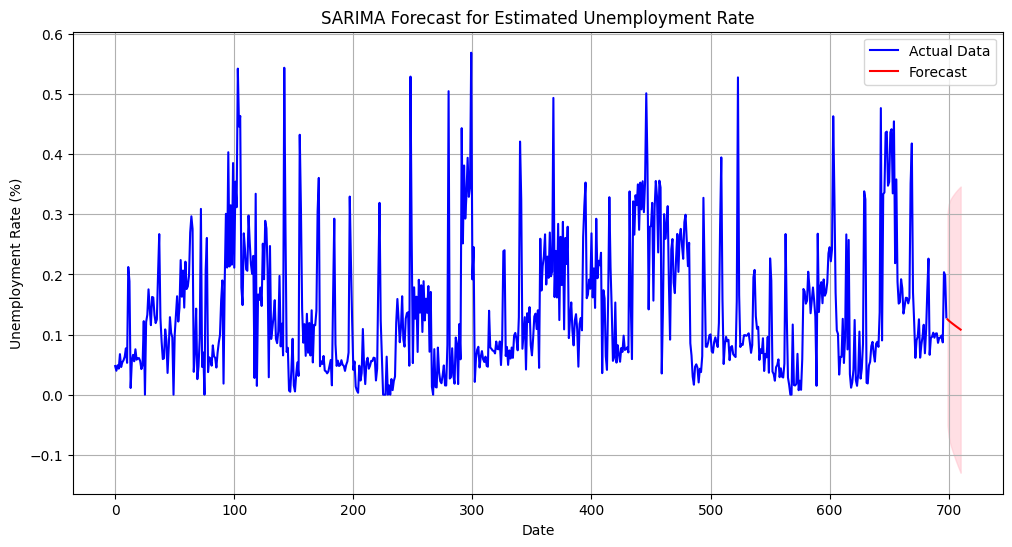

In [ ]:
# Plot the original data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Estimated Unemployment Rate (%)'], label='Actual Data', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, forecast_conf_int['lower Estimated Unemployment Rate (%)'], forecast_conf_int['upper Estimated Unemployment Rate (%)'], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Estimated Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()




```

 #### FORECASTING VALUE

In [ ]:
# Extract the forecasting values
forecast_values = forecast_mean.values

# Print or use the forecasting values
print("Forecasted Unemployment Rate for the next {} periods:".format(forecast_steps))
print(forecast_values)

Forecasted Unemployment Rate for the next 12 periods:
[0.12528219 0.12325018 0.1215518  0.1199589  0.11840923 0.11688566
 0.11538335 0.11390079 0.11243741 0.11099287 0.10956689 0.10815923]


#### ACCURACY OF THE MODEL

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values (ground truth)
actual_values = data['Estimated Unemployment Rate (%)'].tail(forecast_steps)

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast_values)

# Calculate MSE
mse = mean_squared_error(actual_values, forecast_values)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

# Print the accuracy metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


Mean Absolute Error (MAE): 0.03391348589644033
Mean Squared Error (MSE): 0.001814971997866844
Root Mean Squared Error (RMSE): 0.04260248816520983
Mean Absolute Percentage Error (MAPE): 26.943796343014203 %
